Association Rules

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('my_movies.csv')
df=df.fillna("NA")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NA,NA,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NA,NA,NA,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NA,NA,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NA,NA,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NA,NA,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NA,NA,NA,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NA,NA,NA,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NA,NA,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NA,1,1,0,0,0,0,0,1,0,1


In [3]:
mylist=list(set(df.V1).union(set(df.V2)).union(set(df.V3)).union(set(df.V4)).union(set(df.V5)))
mylist.remove('NA')
mylist

['LOTR',
 'Braveheart',
 'Sixth Sense',
 'Harry Potter2',
 'LOTR1',
 'Green Mile',
 'Patriot',
 'Gladiator',
 'Harry Potter1',
 'LOTR2']

In [4]:
myrow_list=df.iloc[:,0:5].values.tolist()
myrow_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'NA', 'NA'],
 ['LOTR1', 'LOTR2', 'NA', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Harry Potter1', 'Harry Potter2', 'NA', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'NA', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'NA']]

In [5]:
relation_list=[]
relation_list1=[]
for i in myrow_list:
    for j in i:
        for x in range(len(i)-1):
            relation_list.append([i[x],i[x+1]])
df123=pd.DataFrame(relation_list)
df123=df123[df123.duplicated()==False]
df123.reset_index(inplace=True,drop=True)
df123.replace(to_replace='NA',value=np.NAN,inplace=True)
df123=df123.dropna()
myrelationship=df123.values.tolist()

In [6]:
myrelationship

[['Sixth Sense', 'LOTR1'],
 ['LOTR1', 'Harry Potter1'],
 ['Harry Potter1', 'Green Mile'],
 ['Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot'],
 ['Patriot', 'Braveheart'],
 ['LOTR1', 'LOTR2'],
 ['Patriot', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Sixth Sense', 'LOTR'],
 ['LOTR', 'Gladiator'],
 ['Gladiator', 'Green Mile']]

In [7]:
index=df.iterrows()

In [8]:
Row_list =[]
for index, rows in df.iterrows():
    my_list =[rows.V1, rows.V2, rows.V3,rows.V4,rows.V5]
    Row_list.append(my_list)

In [9]:
Row_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', 'NA', 'NA'],
 ['LOTR1', 'LOTR2', 'NA', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Harry Potter1', 'Harry Potter2', 'NA', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'NA', 'NA', 'NA'],
 ['Gladiator', 'Patriot', 'Sixth Sense', 'NA', 'NA'],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', 'NA']]

In [10]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [11]:
te = TransactionEncoder()
te_ary = te.fit(Row_list).transform(Row_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.drop('NA',axis=1,inplace=True)
df

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,False,True,True,False,False,True,True,False,True
1,True,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False
3,False,True,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,True,True
5,False,True,False,False,False,False,False,False,True,True
6,False,False,False,True,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,True,True
9,False,True,True,False,False,True,False,False,False,True


## 1. Association rules with 10% Support and 70% confidence

In [12]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.1,(Braveheart),1
1,0.7,(Gladiator),1
2,0.2,(Green Mile),1
3,0.2,(Harry Potter1),1
4,0.1,(Harry Potter2),1
5,0.1,(LOTR),1
6,0.2,(LOTR1),1
7,0.2,(LOTR2),1
8,0.6,(Patriot),1
9,0.6,(Sixth Sense),1


In [13]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules.to_clipboard()
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
1,(Braveheart),(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
124,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Harry Potter1, Green Mile)","(LOTR2, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [14]:
def to_list(i):
    return (sorted(list(i)))

In [15]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [16]:
ma_X

0                                [Braveheart, Gladiator]
1                                  [Braveheart, Patriot]
2                                      [LOTR, Gladiator]
3                                   [Gladiator, Patriot]
4                                   [Patriot, Gladiator]
                             ...                        
124    [Green Mile, LOTR1, Harry Potter1, LOTR2, Sixt...
125    [Harry Potter1, LOTR1, Green Mile, LOTR2, Sixt...
126    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
127    [Green Mile, LOTR2, Harry Potter1, LOTR1, Sixt...
128    [Harry Potter1, LOTR2, Green Mile, LOTR1, Sixt...
Length: 129, dtype: object

In [17]:
ma_X = ma_X.apply(sorted)

In [18]:
ma_X

0                                [Braveheart, Gladiator]
1                                  [Braveheart, Patriot]
2                                      [Gladiator, LOTR]
3                                   [Gladiator, Patriot]
4                                   [Gladiator, Patriot]
                             ...                        
124    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
125    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
126    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
127    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
128    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
Length: 129, dtype: object

In [19]:
rules_sets = list(ma_X)
rules_sets

[['Braveheart', 'Gladiator'],
 ['Braveheart', 'Patriot'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Sixth Sense'],
 ['Green Mile', 'LOTR'],
 ['Green Mile', 'Sixth Sense'],
 ['Harry Potter1', 'Harry Potter2'],
 ['LOTR', 'Sixth Sense'],
 ['LOTR1', 'LOTR2'],
 ['LOTR1', 'LOTR2'],
 ['Braveheart', 'Gladiator', 'Patriot'],
 ['Braveheart', 'Gladiator', 'Patriot'],
 ['Braveheart', 'Gladiator', 'Patriot'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Gladiator', 'Green Mile', 'Sixth Sense'],
 ['Gladiator', 'LOTR', 'Sixth Sense'],
 ['Gladiator', 'LOTR', 'Sixth Sense'],
 ['Gladiator', 'LOTR', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Green Mile', 'Harry Potter1', 

In [20]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [21]:
list1=[]
for i in rules_sets:
    list1.append(tuple(i))
print(tuple(set(list1)))
unique_rules_sets=list(set(list1))

(('LOTR1', 'LOTR2', 'Sixth Sense'), ('Gladiator', 'Green Mile', 'LOTR', 'Sixth Sense'), ('Braveheart', 'Patriot'), ('Gladiator', 'Patriot'), ('Gladiator', 'Sixth Sense'), ('Green Mile', 'Harry Potter1', 'LOTR1'), ('Gladiator', 'Patriot', 'Sixth Sense'), ('Green Mile', 'Harry Potter1', 'LOTR2', 'Sixth Sense'), ('Braveheart', 'Gladiator', 'Patriot'), ('Harry Potter1', 'LOTR2', 'Sixth Sense'), ('Gladiator', 'Green Mile', 'Sixth Sense'), ('Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR2'), ('Harry Potter1', 'LOTR1', 'LOTR2'), ('Green Mile', 'LOTR1', 'Sixth Sense'), ('Green Mile', 'Sixth Sense'), ('Gladiator', 'LOTR'), ('LOTR', 'Sixth Sense'), ('Green Mile', 'Harry Potter1', 'LOTR2'), ('Gladiator', 'LOTR', 'Sixth Sense'), ('Green Mile', 'LOTR', 'Sixth Sense'), ('Green Mile', 'LOTR1', 'LOTR2', 'Sixth Sense'), ('Green Mile', 'LOTR2', 'Sixth Sense'), ('Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR2', 'Sixth Sense'), ('Harry Potter1', 'LOTR1', 'LOTR2', 'Sixth Sense'), ('Harry Potter1', 'Harry Pott

In [22]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(list(i)))

In [23]:
index_rules

[51,
 53,
 1,
 3,
 5,
 26,
 24,
 80,
 13,
 48,
 20,
 62,
 43,
 39,
 8,
 2,
 10,
 29,
 21,
 34,
 89,
 41,
 106,
 97,
 9,
 16,
 11,
 45,
 71,
 0,
 37,
 7,
 32]

In [24]:
rules_no_redudancy  = rules.iloc[index_rules,:]
rules_no_redudancy.shape

(33, 9)

In [25]:
mylift_1_8=rules_no_redudancy[rules_no_redudancy.lift>1.8]
mylift_1_8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
26,"(LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
62,"(LOTR1, Harry Potter1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
43,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
29,"(Harry Potter1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
106,"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
16,"(LOTR, Gladiator)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
11,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
37,"(LOTR1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [26]:
from pyvis.network import Network
net2=Network(directed=True)
for i in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    for j in i:
        net2.add_node(str(j))
for i,j in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    net2.add_edge(str(i),str(j))
net2.show('nodes1.html',local=False)

G:\ExcelR\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
G:\ExcelR\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


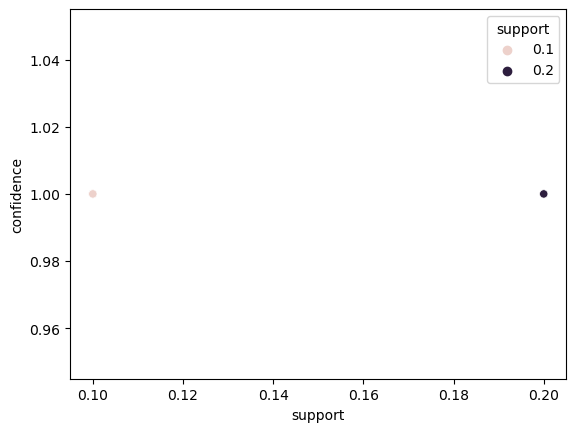

In [27]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=mylift_1_8,hue='support')
plt.show()

## 2. Association rules with 15% Support and 90% confidence

In [28]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.7,(Gladiator),1
1,0.2,(Green Mile),1
2,0.2,(Harry Potter1),1
3,0.2,(LOTR1),1
4,0.2,(LOTR2),1
5,0.6,(Patriot),1
6,0.6,(Sixth Sense),1
7,0.6,"(Gladiator, Patriot)",2
8,0.5,"(Gladiator, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


In [29]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


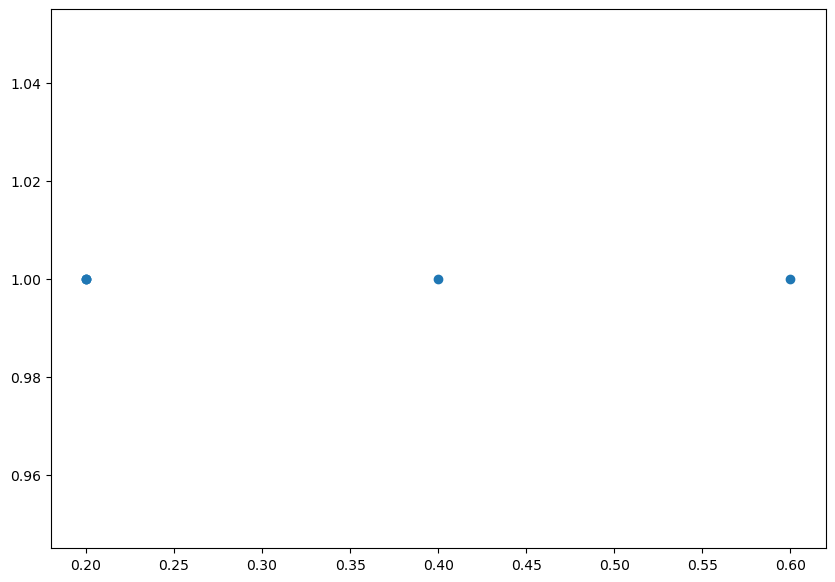

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(rules.support,rules.confidence)

In [31]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [32]:
ma_X

0                 [Patriot, Gladiator]
1            [Green Mile, Sixth Sense]
2                       [LOTR1, LOTR2]
3                       [LOTR2, LOTR1]
4    [Patriot, Sixth Sense, Gladiator]
dtype: object

In [33]:
ma_X = ma_X.apply(sorted)

In [34]:
ma_X

0                 [Gladiator, Patriot]
1            [Green Mile, Sixth Sense]
2                       [LOTR1, LOTR2]
3                       [LOTR1, LOTR2]
4    [Gladiator, Patriot, Sixth Sense]
dtype: object

In [35]:
rules_sets = list(ma_X)
rules_sets

[['Gladiator', 'Patriot'],
 ['Green Mile', 'Sixth Sense'],
 ['LOTR1', 'LOTR2'],
 ['LOTR1', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Sixth Sense']]

In [36]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [37]:
list1=[]
for i in rules_sets:
    list1.append(tuple(i))
print(tuple(set(list1)))
unique_rules_sets=list(set(list1))

(('Green Mile', 'Sixth Sense'), ('LOTR1', 'LOTR2'), ('Gladiator', 'Patriot'), ('Gladiator', 'Patriot', 'Sixth Sense'))


In [38]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(list(i)))

In [39]:
index_rules

[1, 2, 0, 4]

In [40]:
rules_no_redudancy  = rules.iloc[index_rules,:]
rules_no_redudancy.shape

(4, 9)

In [41]:
mylift_1_8=rules_no_redudancy

In [42]:
net3=Network(directed=True)
for i in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    for j in i:
        net3.add_node(str(j))
for i,j in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    net3.add_edge(str(i),str(j))
net3.show('nodes2.html',local=False)

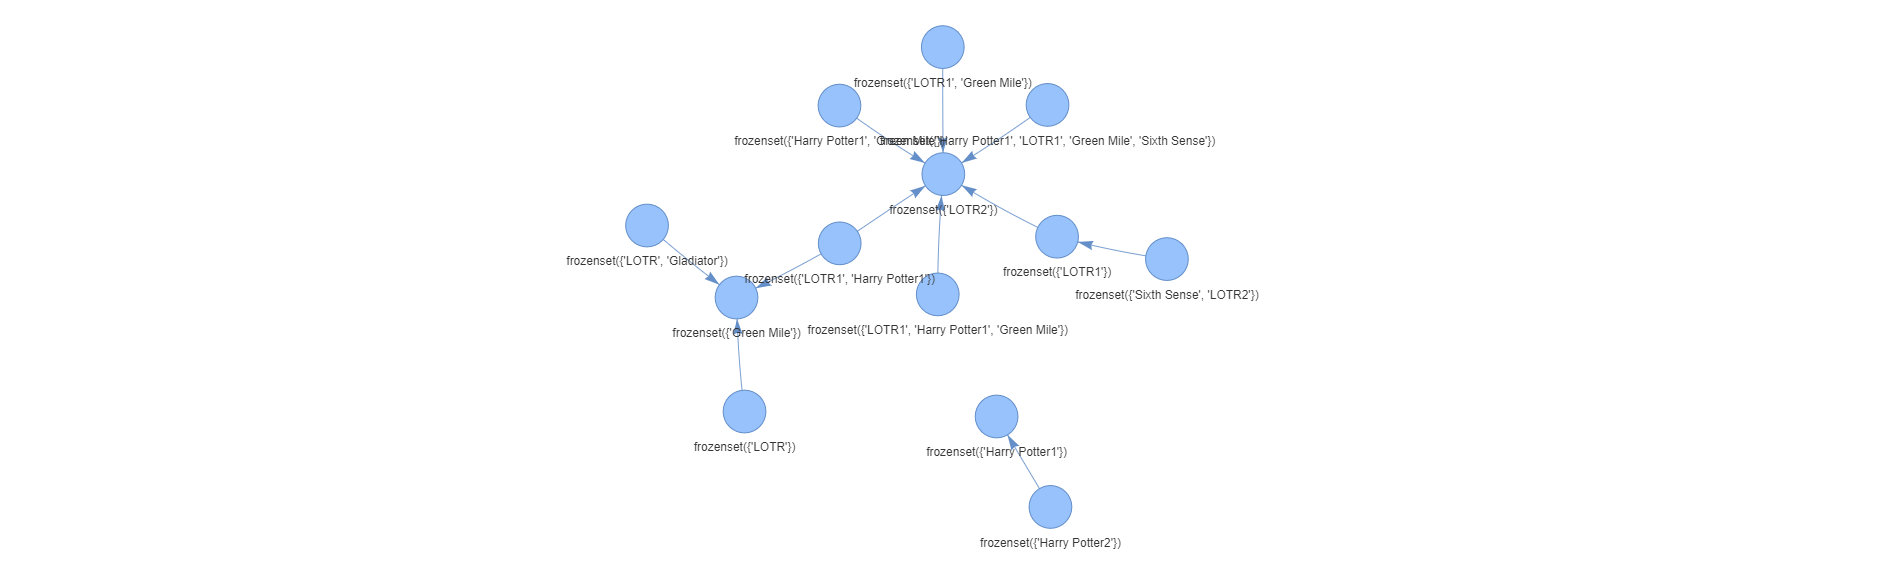